In [1]:
cd ..

/home/ulfaslak@gmail.com/backup/pipeline_code


In [2]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn import gaussian_process

from scipy.stats import pearsonr

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set_style("ticks", {"xtick.direction": "in", "ytick.direction": "in"})  # <-- STYLE
import numpy as np
import pandas as pd
import json
from collections import Counter

from build_dataset.analysis.compute_thetas import compute_thetas

In [23]:
## General variables
TMPFIGPATH = "visualisation/figures/"
FIGPATH = "../../master_thesis/figures/"
tc = "tc1_spring"

## General dictionaries
with open('globals/feature_name_map.json') as infile:
    feature_name_map = json.load(infile)
with open('globals/super_traits.json') as infile:
    super_traits = json.load(infile)
with open('globals/trait_sign.json') as infile:
    trait_sign = json.load(infile)

## Load data
Xtz = np.loadtxt("data/Xtz_%s.csv" % tc, delimiter=",")

Xtz_clean_svm = np.loadtxt("data/Xtz_%s_clean_svm.csv" % tc, delimiter=",")
Xtz_clean_kd = np.loadtxt("data/Xtz_%s_clean_kd.csv" % tc, delimiter=",")

Y_clean_kd = np.loadtxt("data/Y_%s_clean_kd.csv" % tc, delimiter=",")
Y_clean_svm = np.loadtxt("data/Y_%s_clean_svm.csv" % tc, delimiter=",")
M_clean_kd = np.loadtxt("data/M_%s_clean_kd.csv" % tc, delimiter=",")
M_clean_svm = np.loadtxt("data/M_%s_clean_svm.csv" % tc, delimiter=",")

Xtz_clean_svm_valid_users = np.loadtxt("data/XtzYM_%s_clean_svm_valid_users.csv" % tc, delimiter=",")
Xtz_clean_kd_valid_users = np.loadtxt("data/XtzYM_%s_clean_kd_valid_users.csv" % tc, delimiter=",")

feat_names = np.load("data/X_2014_%s_feat_names_sorted.pickle" % None)
    
## General functions
def cl(f):
    return '_'.join(('_'.join(f.split("__allweek__allday__"))).split("__"))
def cp(f):
    return ' '.join([w.capitalize() for w in f.split('_')])

## Regression

In [24]:
t = -1
lm1 = LR().fit(Xtz_clean_svm, M_clean_svm[:, t])
lm2 = Lasso(alpha=0.001).fit(Xtz_clean_svm, M_clean_svm[:, t])
lm3 = Ridge(alpha=.01).fit(Xtz_clean_svm, M_clean_svm[:, t])
lm4 = BayesianRidge().fit(Xtz_clean_svm, M_clean_svm[:, t])
gp = gaussian_process.GaussianProcess(nugget=5, theta0=1e-2, thetaL=1e-4, thetaU=1e-1).fit(Xtz_clean_svm, M_clean_svm[:, t])

In [25]:
print lm1.score(Xtz_clean_svm, M_clean_svm[:, t])
print lm2.score(Xtz_clean_svm, M_clean_svm[:, t])
print lm3.score(Xtz_clean_svm, M_clean_svm[:, t])
print lm4.score(Xtz_clean_svm, M_clean_svm[:, t])
print gp.score(Xtz_clean_svm, M_clean_svm[:, t])

0.187261491863
0.179668919833
0.187261491364
0.148467035416
0.187348509367


In [26]:
pd.options.display.max_columns = 100
sorted(zip(feat_names, lm2.coef_), key=lambda x: x[1], reverse=True)

[('interaction_autocorrelation_physical', 0.010244807425571862),
 ('percent_initiated_conversations_text_std', 0.0096331135460837897),
 ('duration_text', 0.0091578343127716993),
 ('ratio_interactions_campus_other_physical+stop', 0.0087310276167765783),
 ('percent_initiated_conversations_call_std', 0.0046177386364250998),
 ('percent_nocturnal_screen', 0.0037179952976176414),
 ('duration_stop', 0.0029181918286957133),
 ('response_delay_call_mean', 0.0028390566734035291),
 ('response_delay_text_std', 0.0026815370639893675),
 ('response_delay_text_mean', 0.0024626974834787625),
 ('duration_physical', 0.0017108362358345321),
 ('duration_screen', 0.0010516072268137492),
 ('number_of_contacts_stop', 0.00056831799292249405),
 ('ratio_social_screen_alone_screen_physical+screen', -0.0),
 ('percent_initiated_conversations_call_mean', -0.0),
 ('response_rate_text+call_mean', 0.0),
 ('first_seen_response_rate_text+screen', 0.0),
 ('overlap_conversations_physical', 0.0),
 ('percent_outside_campus_fr

In [27]:
pd.DataFrame(np.corrcoef(Y_clean_svm.T))

,0,1,2,3,4
0,1.000000,0.062622,0.281358,0.137568,-0.154962
1,0.062622,1.000000,0.057414,0.169517,-0.072599
2,0.281358,0.057414,1.000000,0.271257,-0.304993
3,0.137568,0.169517,0.271257,1.000000,-0.229469
4,-0.154962,-0.072599,-0.304993,-0.229469,1.000000


In [28]:
print np.mean(Y_clean_svm, axis=0)
print np.mean(Y_clean_kd, axis=0)

[ 2.54839506  2.37308642  2.49845679  2.79698217  1.32416226]
[ 2.54634146  2.37560976  2.49939024  2.79322493  1.33275261]


percent_initiated_conversations_text_mean


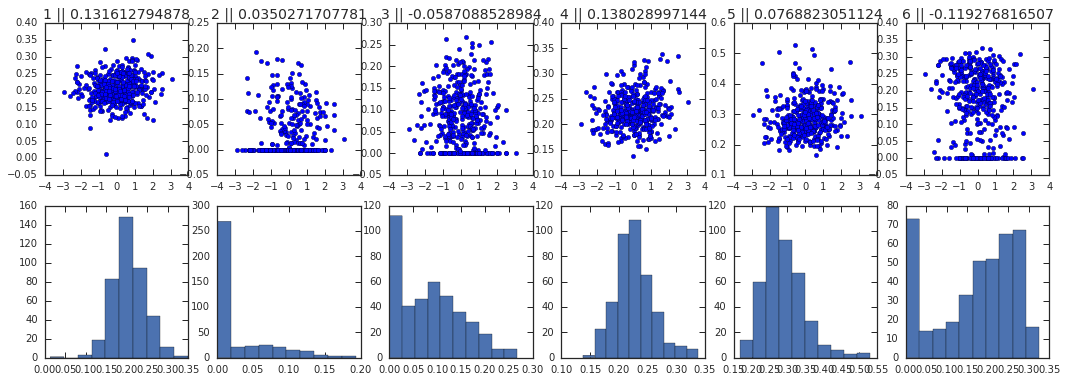

In [29]:
c = 10
print feat_names[c]
plt.figure(figsize=(18,6))
for i in range(6):
    plt.subplot(2, 6, i+1)
    plt.title('123456'[i] + " || " + str(pearsonr(Xtz_clean_svm[:, c], M_clean_svm[:, i])[0]), fontsize=14)
    plt.scatter(Xtz_clean_svm[:, c], M_clean_svm[:, i])
for i in range(6):
    plt.subplot(2, 6, i+7)
    plt.hist(M_clean_svm[:, i], bins=10)
plt.show()

## Archetype stories

In [30]:
def col_shuf(arr):
    arr = arr.copy()
    for i in range(arr.shape[1]):
        np.random.shuffle(arr[:, i])
    return arr

def multiply_comparisons_p_value(p_arr):
    return 1 - np.prod([1 - p for p in p_arr])

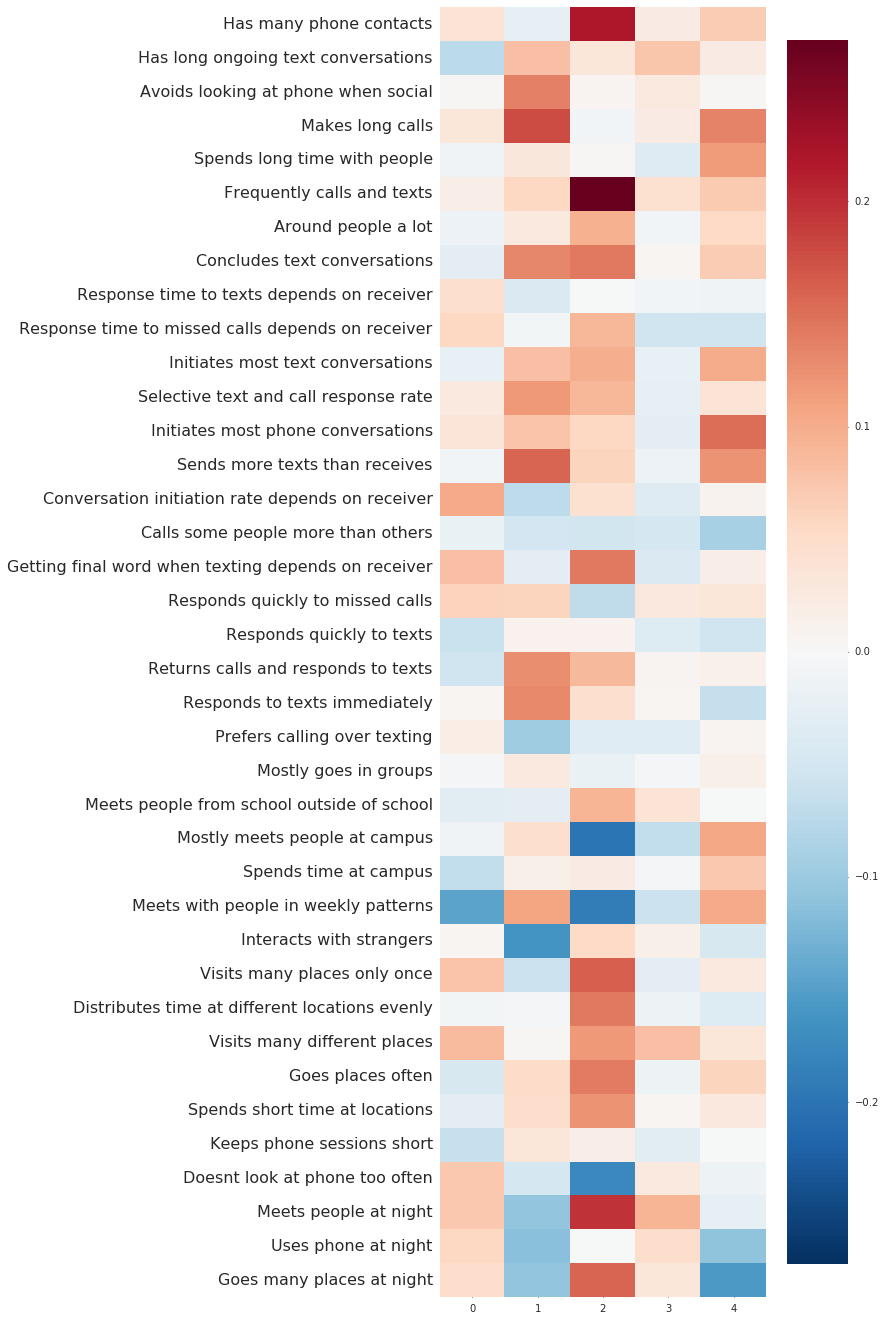

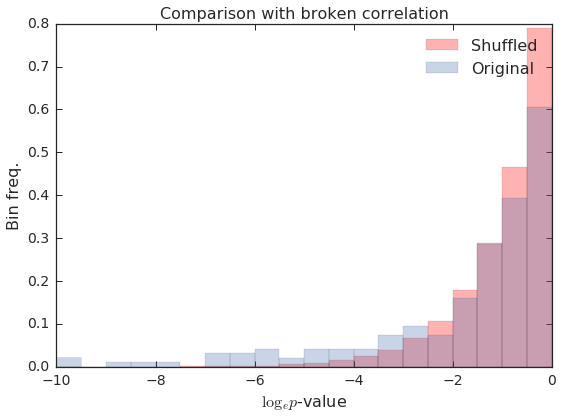

In [31]:
Xtz_clean_svm_s = col_shuf(Xtz_clean_svm)

C1 = np.empty((Xtz_clean_kd.shape[1], Y_clean_kd.shape[1]))
P = np.empty((Xtz_clean_kd.shape[1], Y_clean_kd.shape[1]))
for i in range(Xtz_clean_kd.shape[1]):
    for j in range(Y_clean_kd.shape[1]):
        C1[i, j], P[i, j] = pearsonr(Xtz_clean_svm[:, i], Y_clean_svm[:, j])
        
Ps = []
for _ in range(100):
    Y_clean_svm_s = col_shuf(Y_clean_svm)
    for i in range(Xtz_clean_kd.shape[1]):
        for j in range(Y_clean_kd.shape[1]):
            Ps.append(pearsonr(Xtz_clean_svm_s[:, i], Y_clean_svm_s[:, j])[1])
        
plt.figure(figsize=(12, 18.5))
sns.heatmap(C1, annot=False, yticklabels=[feature_name_map[n] for n in feat_names])
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig(TMPFIGPATH+"X_Y_correlation.pdf")

plt.figure(figsize=(8,6))
plt.title("Comparison with broken correlation", fontsize=16)
plt.hist(np.log(Ps), alpha=0.3, bins=np.arange(-10, 0.5, 0.5), label="Shuffled", color="r", normed=True)
plt.hist(np.log(P.reshape((1, -1))[0]), alpha=0.3, bins=np.arange(-10, 0.5, 0.5), label="Original", normed=True)
plt.xlabel("$\log_e{p}$-value", fontsize=16)
plt.ylabel("Bin freq.", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig(TMPFIGPATH+"X_Y_p_values_histogram.pdf")

Computing Thetas from precomputed archetypes.
Computing Thetas from precomputed archetypes.
Computing Thetas from precomputed archetypes.
Computing Thetas from precomputed archetypes.
Computing Thetas from precomputed archetypes.
Computing Thetas from precomputed archetypes.
Computing Thetas from precomputed archetypes.
Computing Thetas from precomputed archetypes.
Computing Thetas from precomputed archetypes.
Computing Thetas from precomputed archetypes.
Computing Thetas from precomputed archetypes.
Computing Thetas from precomputed archetypes.
Computing Thetas from precomputed archetypes.
Computing Thetas from precomputed archetypes.
Computing Thetas from precomputed archetypes.
Computing Thetas from precomputed archetypes.
Computing Thetas from precomputed archetypes.
Computing Thetas from precomputed archetypes.
Computing Thetas from precomputed archetypes.
Computing Thetas from precomputed archetypes.
Computing Thetas from precomputed archetypes.
Computing Thetas from precomputed 

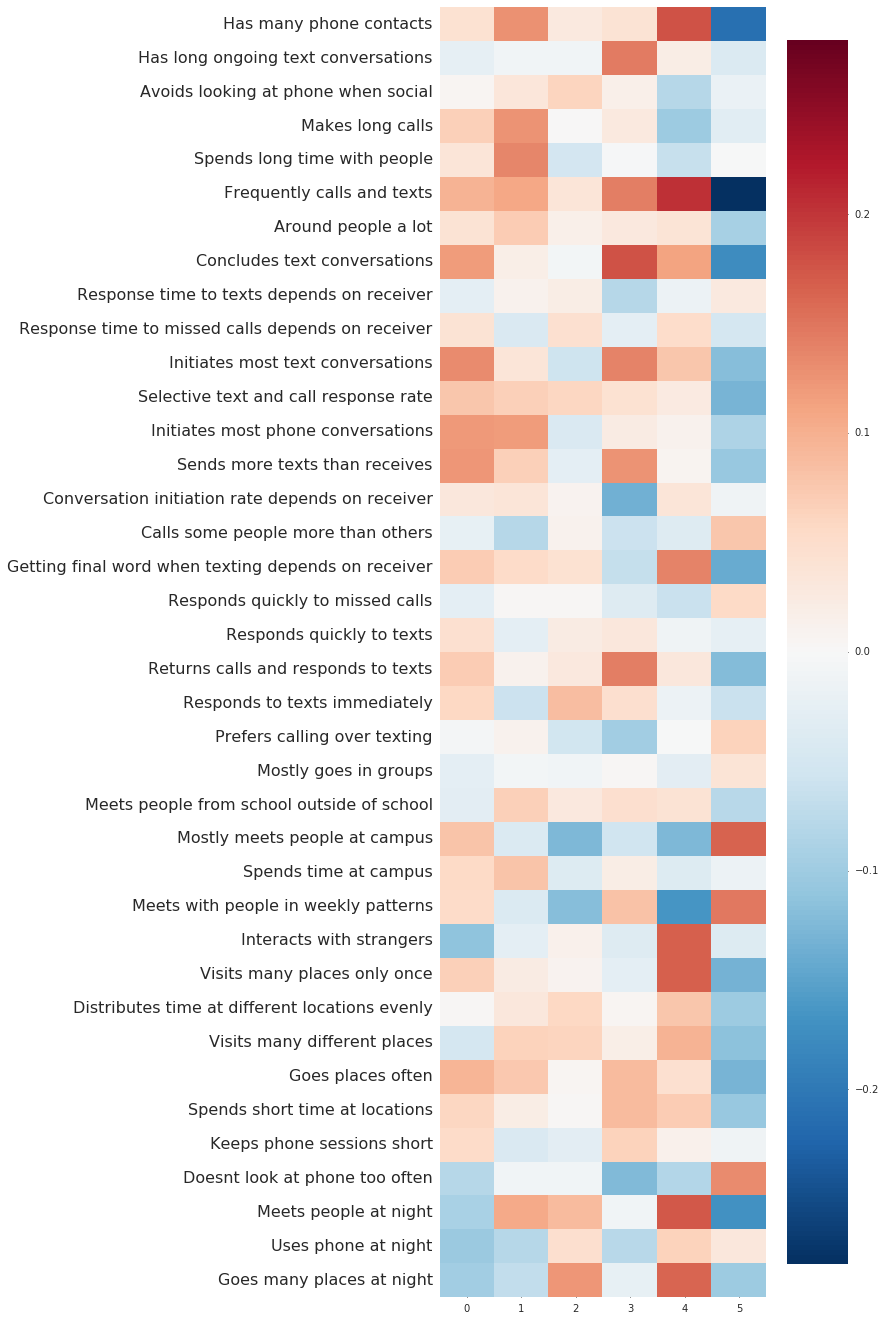

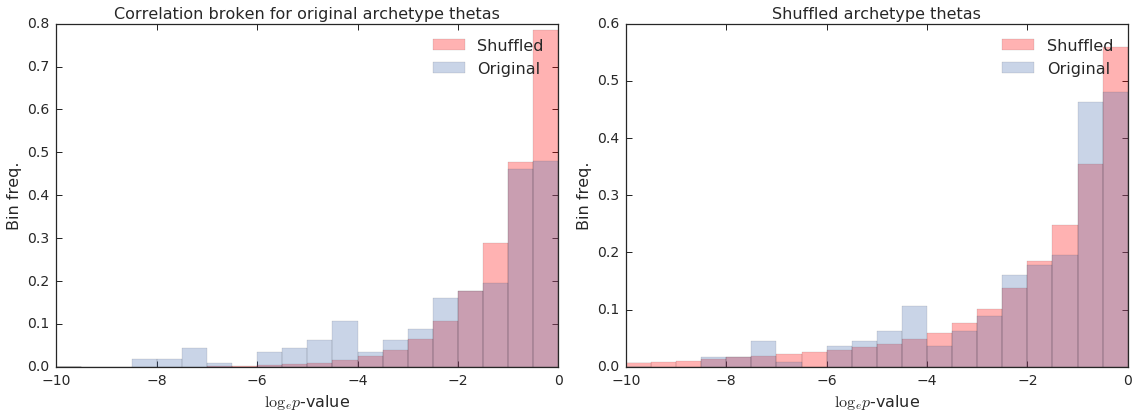

In [32]:
Xtz_clean_svm_s = col_shuf(Xtz_clean_svm)

C2 = np.empty((Xtz_clean_kd.shape[1], M_clean_kd.shape[1]))
P = np.empty((Xtz_clean_kd.shape[1], M_clean_kd.shape[1]))
for i in range(Xtz_clean_kd.shape[1]):
    for j in range(M_clean_kd.shape[1]):
        C2[i, j], P[i, j] = pearsonr(Xtz_clean_svm[:, i], M_clean_svm[:, j])
        
Ps = []
Parcs_s = []
for _ in range(1000):
    M_clean_svm_s = col_shuf(M_clean_svm)
    M_clean_svm_arcs_s = compute_thetas(Y_clean_svm, shuffle_arcs=True)
    for i in range(Xtz_clean_kd.shape[1]):
        for j in range(M_clean_kd.shape[1]):
            Ps.append(pearsonr(Xtz_clean_svm_s[:, i], M_clean_svm_s[:, j])[1])
            Parcs_s.append(pearsonr(Xtz_clean_svm[:, i], M_clean_svm_arcs_s[:, j])[1])
    
plt.figure(figsize=(12, 18.5))
sns.heatmap(C2, annot=False, yticklabels=[feature_name_map[n] for n in feat_names])
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig(TMPFIGPATH+"X_THETA_correlation.pdf")

plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.title("Correlation broken for original archetype thetas", fontsize=16)
plt.hist(np.log(Ps), alpha=0.3, bins=np.arange(-10, 0.5, 0.5), label="Shuffled", color="r", normed=True)
plt.hist(np.log(P.reshape((1, -1))[0]), alpha=0.3, bins=np.arange(-10, 0.5, 0.5), label="Original", normed=True)
plt.xlabel("$\log_e{p}$-value", fontsize=16)
plt.ylabel("Bin freq.", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
plt.subplot(1, 2, 2)
plt.title("Shuffled archetype thetas", fontsize=16)
plt.hist(np.log(Parcs_s), alpha=0.3, bins=np.arange(-10, 0.5, 0.5), label="Shuffled", color="r", normed=True)
plt.hist(np.log(P.reshape((1, -1))[0]), alpha=0.3, bins=np.arange(-10, 0.5, 0.5), label="Original", normed=True)
plt.xlabel("$\log_e{p}$-value", fontsize=16)
plt.ylabel("Bin freq.", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig(TMPFIGPATH+"X_THETA_p_values_histogram.pdf")

### Point out non-non-linearity in archetype correlation

In [33]:
def regr_ocean(v, C):
    C = (C / np.mean(C, axis=0) - 1)
    return np.dot(C, v)
def regr_bfarcs(v, C):
    C = (C / np.mean(C, axis=0) - 1)
    return np.dot(C, v)

In [34]:
x, y = np.empty((38, 0)), np.empty((38, 0))
for u in range(Xtz_clean_kd.shape[0]):
    x = np.hstack([x, regr_ocean(Y_clean_kd[u], C1).reshape((-1, 1))])
    y = np.hstack([y, regr_bfarcs(M_clean_kd[u], C2).reshape((-1, 1))])

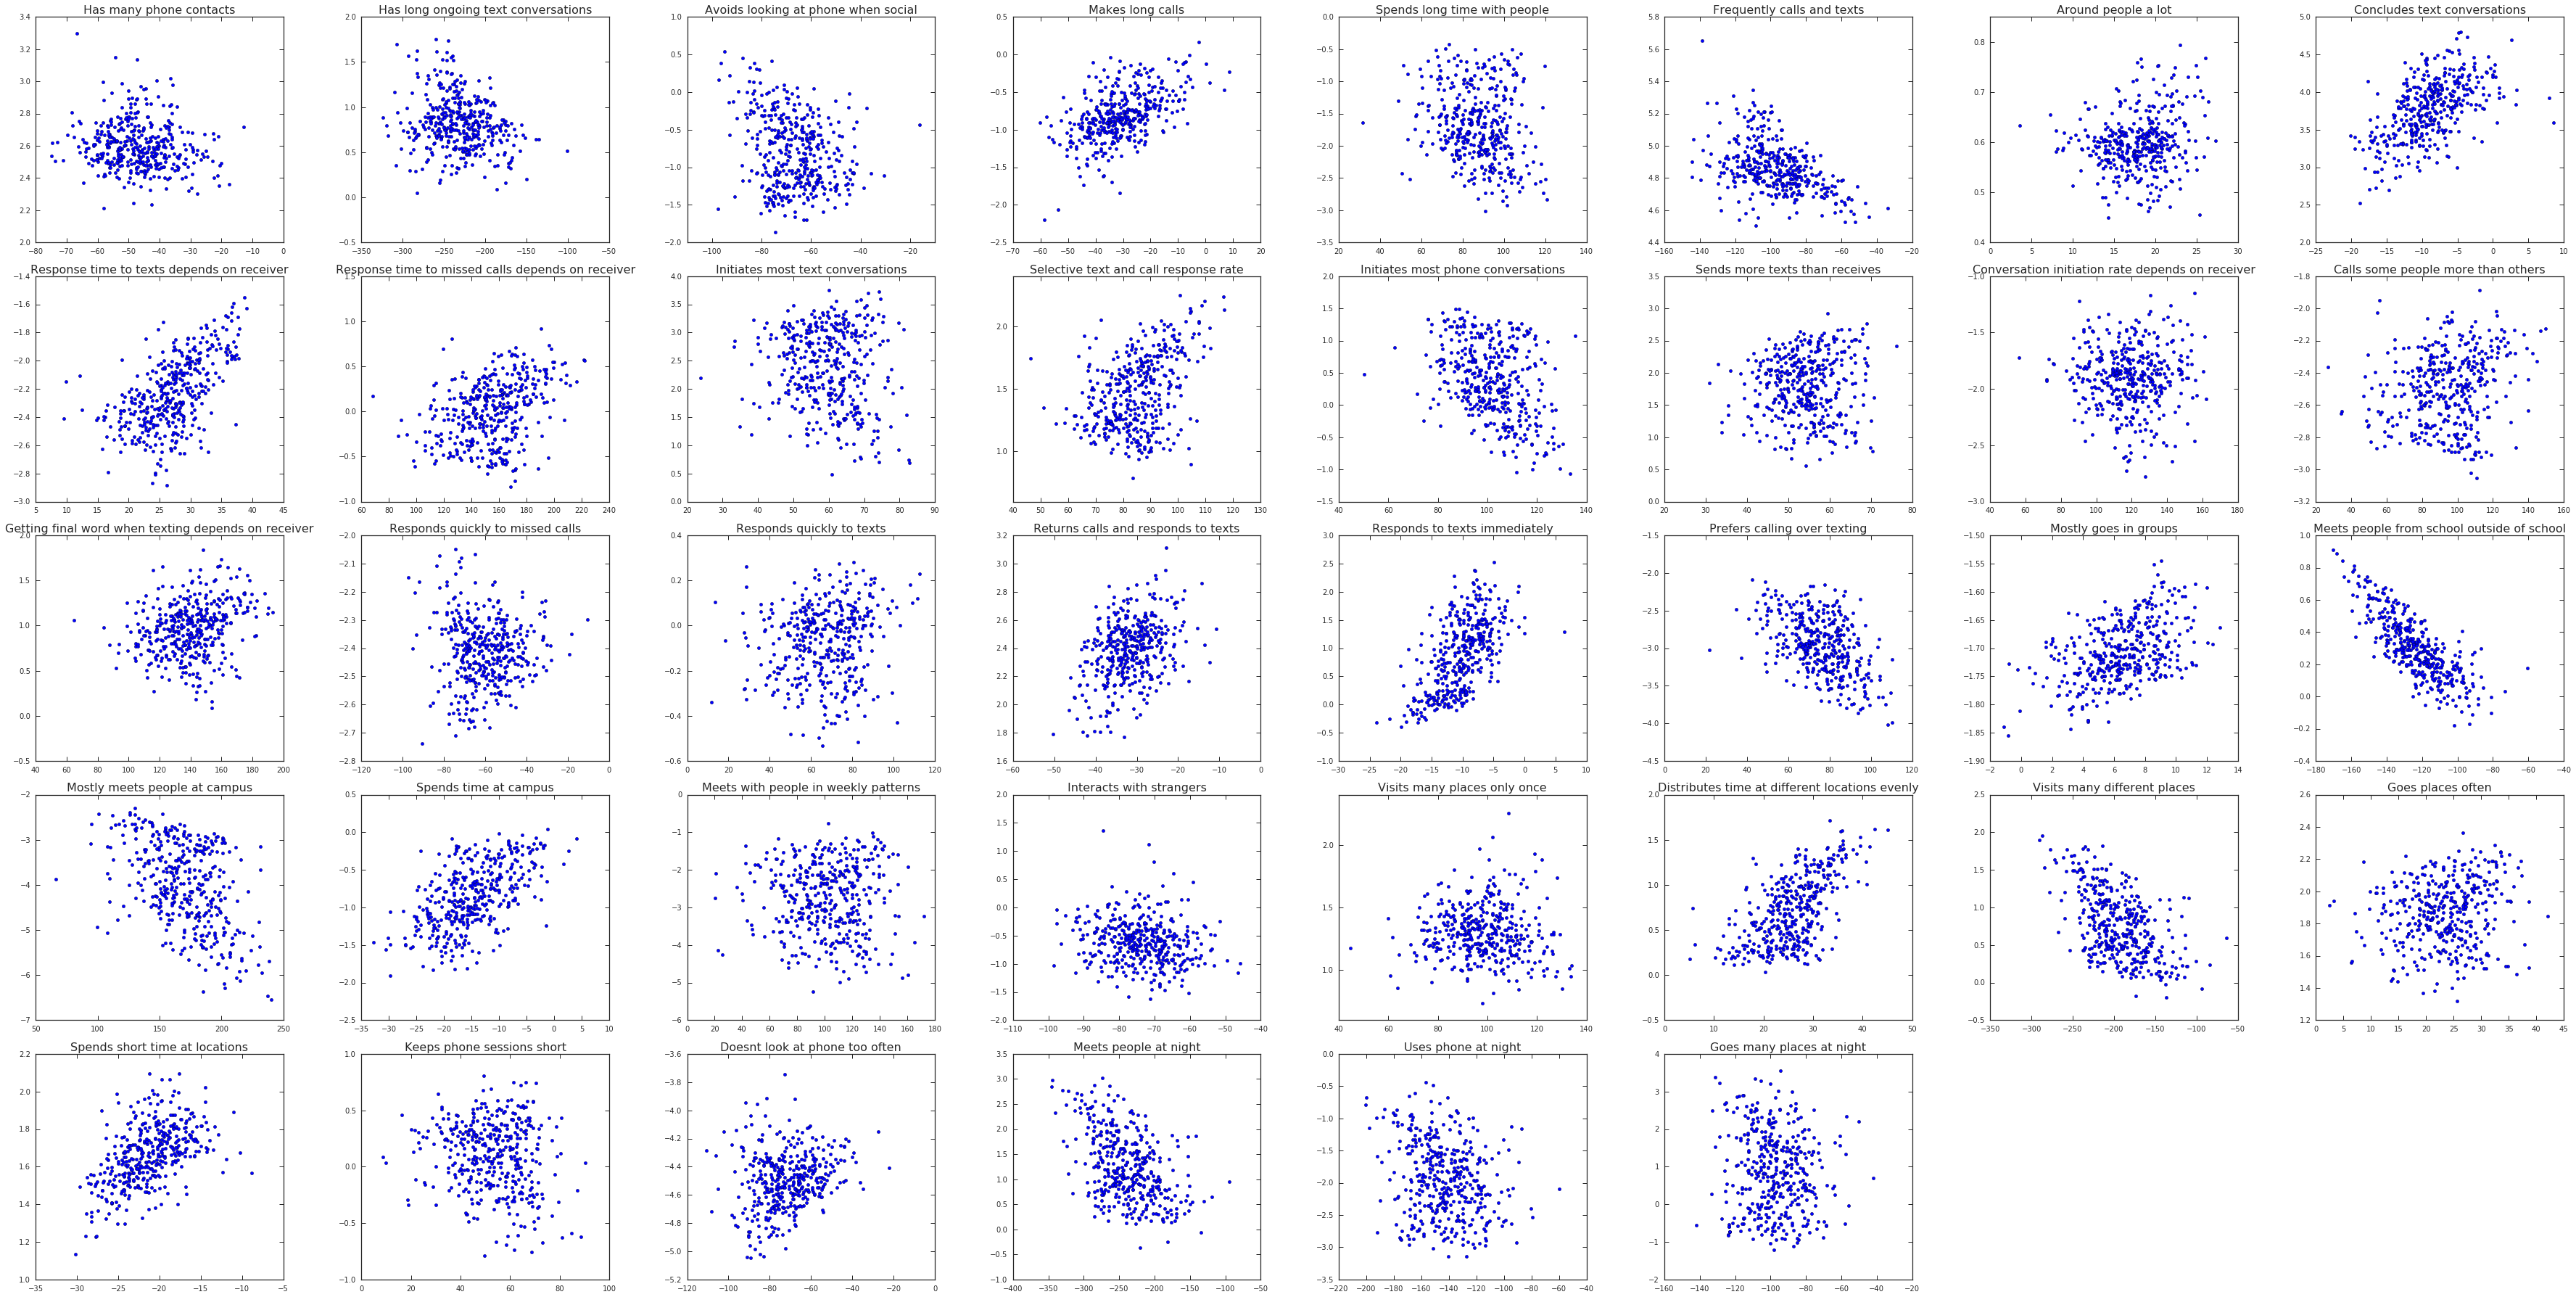

In [35]:
plt.figure(figsize=(50, 25))
for i in range(len(x)):
    plt.subplot(5, 8, i+1)
    plt.title(feature_name_map[feat_names[i]], fontsize=16)
    plt.scatter(x[i, :], y[i, :])
plt.tight_layout()
plt.savefig(TMPFIGPATH + "regression_correlations.png")

In [36]:
def interaction_matrix(X):
    I = np.empty((X.shape[0], 0))
    for i in range(X.shape[1]):
        for j in range(X.shape[1]):
            if j < i:
                continue
            I = np.hstack([I, (X[:, i] * X[:, j]).reshape((-1, 1))])
    return I

In [37]:
pd.DataFrame(interaction_matrix(M_clean_kd))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.053546,0.012696,0.000000,0.052507,0.075814,0.036837,0.003010,0.000000,0.012449,0.017975,0.008734,0.000000,0.000000,0.000000,0.000000,0.051488,0.074343,0.036122,0.107343,0.052157,0.025342
1,0.028737,0.000000,0.005980,0.044615,0.044625,0.045562,0.000000,0.000000,0.000000,0.000000,0.000000,0.001244,0.009284,0.009286,0.009481,0.069266,0.069282,0.070738,0.069298,0.070754,0.072240
2,0.020242,0.000000,0.025383,0.032164,0.045998,0.018487,0.000000,0.000000,0.000000,0.000000,0.000000,0.031830,0.040334,0.057681,0.023182,0.051109,0.073090,0.029375,0.104526,0.042009,0.016884
3,0.035463,0.000000,0.024524,0.043291,0.050135,0.034904,0.000000,0.000000,0.000000,0.000000,0.000000,0.016959,0.029937,0.034669,0.024137,0.052847,0.061201,0.042609,0.070875,0.049344,0.034354
4,0.074471,0.035889,0.000000,0.061456,0.072297,0.028781,0.017296,0.000000,0.029617,0.034842,0.013870,0.000000,0.000000,0.000000,0.000000,0.050715,0.059662,0.023751,0.070187,0.027941,0.011123
5,0.039225,0.000000,0.020779,0.047080,0.039683,0.051286,0.000000,0.000000,0.000000,0.000000,0.000000,0.011008,0.024940,0.021022,0.027168,0.056506,0.047629,0.061556,0.040147,0.051885,0.067056
6,0.023075,0.017946,0.020872,0.031719,0.058293,0.000000,0.013956,0.016232,0.024668,0.045335,0.000000,0.018879,0.028690,0.052727,0.000000,0.043602,0.080131,0.000000,0.147262,0.000000,0.000000
7,0.045472,0.020923,0.000000,0.044674,0.056619,0.045554,0.009627,0.000000,0.020555,0.026052,0.020960,0.000000,0.000000,0.000000,0.000000,0.043890,0.055625,0.044755,0.070498,0.056721,0.045636
8,0.015974,0.000000,0.025201,0.028534,0.036332,0.020348,0.000000,0.000000,0.000000,0.000000,0.000000,0.039758,0.045016,0.057318,0.032101,0.050968,0.064898,0.036346,0.082634,0.046280,0.025919
9,0.047661,0.014856,0.031289,0.049290,0.075218,0.000000,0.004631,0.009753,0.015364,0.023446,0.000000,0.020541,0.032358,0.049380,0.000000,0.050974,0.077788,0.000000,0.118708,0.000000,0.000000


38

    Build regression models between Y (big five) values and M (archetype resemblance) values towards each of the 38 behavioral indicators. Show that they do not regress towards the same values exactly. Explain why this may be.

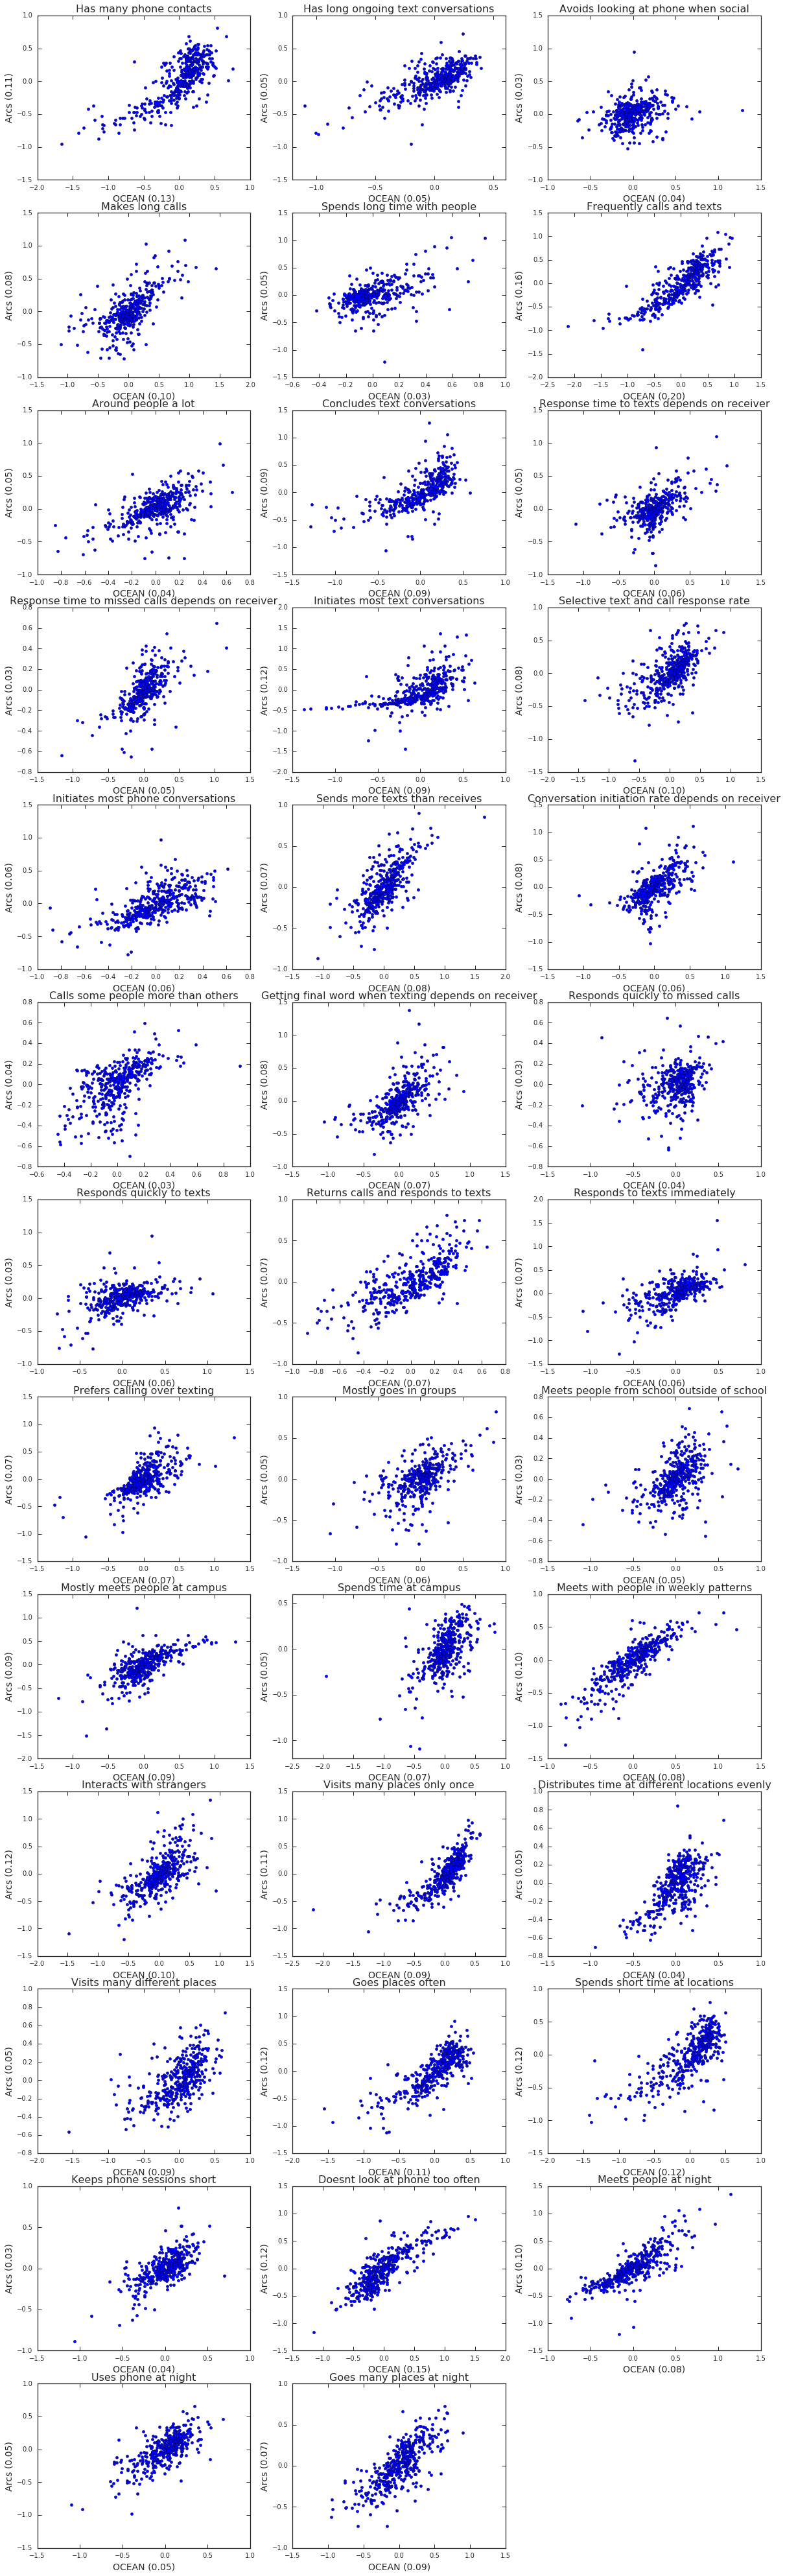

In [39]:
Y_interactions = np.hstack([Y_clean_kd, interaction_matrix(Y_clean_kd)])
M_interactions = np.hstack([M_clean_kd, interaction_matrix(M_clean_kd)])

plt.figure(figsize=(20, 70))
for i in range(len(x)):
    plt.subplot(13, 3, i+1)
    plt.title(feature_name_map[feat_names[i]], fontsize=16)
    lm1 = LR().fit(Y_interactions, Xtz_clean_kd[:, i])
    lm2 = LR().fit(M_interactions, Xtz_clean_kd[:, i])
    plt.scatter(lm1.predict(Y_interactions), lm2.predict(M_interactions))
    plt.xlabel("OCEAN (%.02f)" % lm1.score(Y_interactions, Xtz_clean_kd[:, i]), fontsize=14)
    plt.ylabel("Arcs (%.02f)" % lm2.score(M_interactions, Xtz_clean_kd[:, i]), fontsize=14)
plt.show()

    Show that there is less overlap of correlating indicators with resemblance to AA inferred archetyped than for resemblance to random points in Big Five space. Report a p-value.

In [18]:
overlap_counter = Counter()

sigfeats = []

profiles = ["Achiever", "Host", "Wildcard", "Loyalist", "Hippie", "Follower"]
truefalse = ["", "True", "False"]

for arc in range(6):
    index_mask = []
    sorted_indices, sorted_p_values = zip(*sorted(enumerate(P[:, arc]), key=lambda x: x[1]))
    for e, (i, p) in enumerate(zip(sorted_indices, sorted_p_values)):
        if p <= 0.05 / P.shape[0] * i:
            index_mask[:e+1] = sorted_indices[:e+1]
            
    p_values = P[index_mask, arc]

    dat = []
    for e, i in enumerate(index_mask):
        dat.append(
            (feature_name_map[feat_names[i]] + " (%s)" % truefalse[int(np.sign(C2[i, arc]))], p_values[e])
        )

    dat = sorted(dat, key=lambda v: v[1])
    print arc, ":", profiles[arc], "(MC p-value: %.04f)" % multiply_comparisons_p_value(p_values), " " * (39 - len(profiles[arc])), "    p-values  Mult.Co."

    for i, d in enumerate(dat):
        print " " * 3, "-", d[0], " " * (58 - len(d[0])), "|   (%.04f)" % d[1], " (%.04f)" % multiply_comparisons_p_value(sorted(p_values)[:i+1])
        overlap_counter.update([d[0]])
    print
    
overlap = np.mean(overlap_counter.values())
#product = np.sum([np.prod(P[i, :]) for i in range(P.shape[0])])

0 : Achiever (MC p-value: 0.1071)                                     p-values  Mult.Co.
    - Initiates most text conversations (True)                    |   (0.0080)  (0.0080)
    - Sends more texts than receives (True)                       |   (0.0133)  (0.0212)
    - Initiates most phone conversations (True)                   |   (0.0147)  (0.0356)
    - Concludes text conversations (True)                         |   (0.0168)  (0.0518)
    - Interacts with strangers (False)                            |   (0.0238)  (0.0744)
    - Uses phone at night (False)                                 |   (0.0353)  (0.1071)

1 : Host (MC p-value: 0.1025)                                         p-values  Mult.Co.
    - Spends long time with people (True)                         |   (0.0058)  (0.0058)
    - Has many phone contacts (True)                              |   (0.0103)  (0.0160)
    - Makes long calls (True)                                     |   (0.0113)  (0.0271)
    - Initiates most

In [47]:
i_overlap = []
#i_product = []

for i in range(1000):
    overlap_counter = Counter()
    PS = np.array(Parcs_s[228*i:228*(i+1)]).reshape((38, 6))

    sigfeats = []

    profiles = ["Achiever", "Host", "Wildcard", "Loyalist", "Hippie", "Follower"]
    truefalse = ["", "True", "False"]

    for arc in range(6):
        #p_values = PS[PS[:, arc] <= 0.05, arc]
        
        p_value_mask = []
        sorted_indices, sorted_p_values = zip(*sorted(enumerate(PS[:, arc]), key=lambda x: x[1]))
        for e, (i, p) in enumerate(zip(sorted_indices, sorted_p_values)):
            if p <= 0.05 / PS.shape[0] * i:
                p_value_mask[:e+1] = sorted_indices[:e+1]

        p_values = PS[p_value_mask, arc]

        dat = []
        for index, i in enumerate([list(PS[:, arc]).index(p) for p in p_values]):
            dat.append(
                (feature_name_map[feat_names[i]] + " (%s)" % truefalse[int(np.sign(C2[i, arc]))], p_values[index])
            )

        dat = sorted(dat, key=lambda v: v[1])
        for i, d in enumerate(dat):
            overlap_counter.update([d[0]])
            
    i_overlap.append(np.mean(overlap_counter.values()))
    #i_product.append(np.sum([np.prod(PS[i, :]) for i in range(PS.shape[0])]))

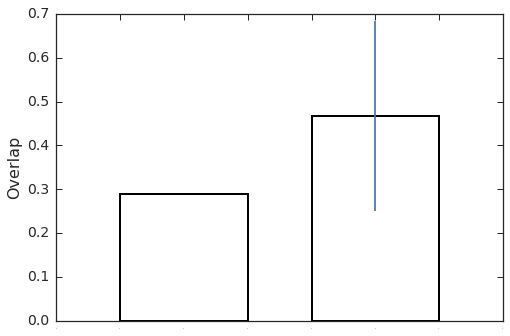

In [48]:
plt.figure()
plt.bar([0.1, 0.4], [overlap-1, np.mean(i_overlap)-1], yerr=[0, np.std(np.array(i_overlap)-1)], width=0.2, color="w", edgecolor="k", linewidth="2")
plt.xlim([0, 0.7])
plt.xticks(fontsize=0)
plt.yticks(fontsize=14)
plt.ylabel("Overlap", fontsize=16)
plt.savefig(TMPFIGPATH + "overlap.pdf")

    Visualise enrichment. Show whether there is reason to postulate that certain indicators increase or decrease their value for subjects who are closer to specific archetypes.

Expl. var. pca: 0.294979181972
Expl. var. arc: 0.914158212797


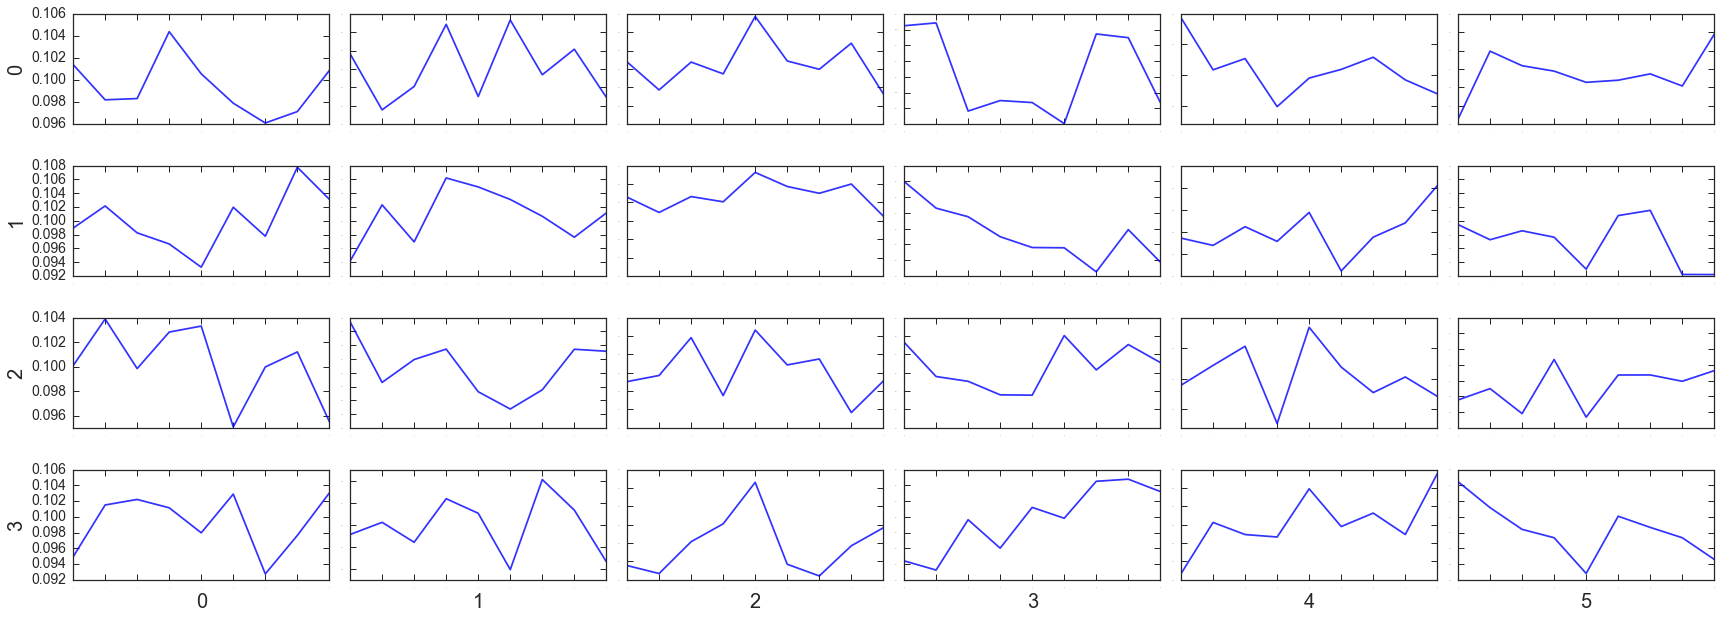

In [168]:
import numpy as np
from py_pcha.PCHA import PCHA
from sklearn.decomposition import PCA
from collections import defaultdict
from itertools import izip_longest

def enrichment(X, Y, noc, dim=None, nbins=10, vis=False, archetypes=None):

    def distance(a, b):
        return np.sqrt(np.sum(a*b))
    
    def prob(p_distr, val):
        try:
            return min(filter(lambda v: v[1] > val, p_distr), key=lambda v: v[1])[0]
        except ValueError:
            return max(p_distr, key=lambda v: v[1])[0]
    
    N, Mx = X.shape
    _, My = Y.shape
    
    if dim is None:
        dim = noc - 1
    
    if archetypes is None:
        # Fit PCA and PCHA on transformed
        pca = PCA(n_components=dim)
        Xpc = pca.fit_transform(X)
        A, C, _, _, varexpl = PCHA(Xpc.T, noc)

        A = A.T.A
        C = C.T.A

        print "Expl. var. pca:", sum(pca.explained_variance_ratio_)
        print "Expl. var. arc:", varexpl
    
    E = np.empty((noc, nbins, My))
    for l in range(noc):
        for k in range(My):
            c = map(lambda x: x[0], sorted(zip(Y[:, k], C[:, l]), key=lambda x: x[1], reverse=True))
            
            tmp = plt.figure()
            p_distr = plt.hist(Y[:, k], bins=10); plt.close(tmp)
            p_distr = zip(p_distr[0]/sum(p_distr[0]), p_distr[1])
            
            bb_prev = 0
            for b, bb in enumerate(map(int, np.linspace(0, 1, nbins+1)*300)[1:]):
                vals = c[bb_prev: bb]
                enr = np.mean(vals)
                
                E[l, b, k] = enr
                
                bb_prev = bb
                
    if vis:
        plt.figure(figsize=(4*My, 20*noc))
        c = 1
        for a in range(noc):
            for k in range(My):
                plt.subplot(Mx, My, c)
                plt.plot(range(nbins), E[a, :, k]/np.sum(E[a, :, k]), color="b", alpha=0.8)
                plt.xticks(fontsize=0)
                plt.yticks(fontsize=0)
                plt.xlim([0, 8])
                
                if k == 0:
                    plt.ylabel(a, fontsize=20)
                    plt.yticks(fontsize=14)
                if a == noc-1:
                    plt.xlabel(k, fontsize=20)
                
                c += 1
        plt.tight_layout()
        plt.savefig(TMPFIGPATH + "enrichments.pdf")
    
    return E, pca.inverse_transform(A)
        
E, arcs_orig = enrichment(Xtz_clean_svm, M_clean_svm, noc=4, nbins=10, vis=True)

In [64]:
pd.DataFrame(np.corrcoef(Y_clean_kd.T))

,0,1,2,3,4
0,1.000000,0.044038,0.335374,0.150097,-0.086261
1,0.044038,1.000000,0.150922,0.246357,-0.037279
2,0.335374,0.150922,1.000000,0.249623,-0.228652
3,0.150097,0.246357,0.249623,1.000000,-0.191773
4,-0.086261,-0.037279,-0.228652,-0.191773,1.000000


In [66]:
pd.DataFrame(arcs_orig.T)

,0,1,2,3
0,-1.384981,1.311812,1.315751,-1.139498
1,-1.590192,-0.915701,0.761313,1.149309
2,-0.016407,-0.450285,0.290695,0.012082
3,-0.209221,-0.353452,-0.326169,0.765430
4,0.229222,-1.695467,0.665354,0.259081
5,-1.614780,0.900032,0.349779,0.365485
6,-0.392064,-1.526086,1.423269,-0.143946
7,-1.914765,-0.751971,0.838960,1.226706
8,0.787944,-0.352014,0.820742,-1.295370
9,0.037525,0.283565,0.281254,-0.525616


In [1099]:
[feature_name_map[n] for n in feat_names]

['Has many phone contacts',
 'Has long ongoing text conversations',
 'Avoids looking at phone when social',
 'Makes long calls',
 'Spends long time with people',
 'Frequently calls and texts',
 'Around people a lot',
 'Concludes text conversations',
 'Response time to texts depends on receiver',
 'Response time to missed calls depends on receiver',
 'Initiates most text conversations',
 'Tends to respond to texts and calls more often for some people than others',
 'Initiates most phone conversations',
 'Sends more texts than receives',
 'Conversation initiation rate depends on receiver',
 'Only starts conversations with some people',
 'Conversation conclusion rate depends on receiver',
 'Responds quickly to missed calls',
 'Responds quickly to texts',
 'Returns calls and responds to texts',
 'Responds to texts immediately',
 'Prefers calling over texting',
 'Mostly goes in groups',
 'Meets people from school outside of school',
 'Mostly meets people at campus',
 'Spends time at campus'